In [1]:
rm(list=ls())

In [2]:
sessionInfo()[[1]]$version.string

[1] "R version 3.6.1 (2019-07-05)"

In [3]:
install.packages('knitr')

also installing the dependency 'xfun'



package 'xfun' successfully unpacked and MD5 sums checked
package 'knitr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KimTaeyoon\AppData\Local\Temp\Rtmp8eHQaE\downloaded_packages


In [4]:
install.packages('tidyverse')
install.packages('RColorBrewer')
install.packages('kableExtra')

also installing the dependencies 'processx', 'glue', 'tidyselect', 'callr', 'withr', 'ellipsis', 'broom', 'cli', 'dbplyr', 'dplyr', 'forcats', 'ggplot2', 'haven', 'hms', 'httr', 'jsonlite', 'lubridate', 'magrittr', 'modelr', 'pillar', 'purrr', 'readr', 'reprex', 'rlang', 'rstudioapi', 'rvest', 'tibble', 'tidyr', 'xml2'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
processx  3.5.1  3.5.2              TRUE
dplyr     1.0.5  1.0.6              TRUE
rlang    0.4.10 0.4.11              TRUE

  Binaries will be installed
package 'processx' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'callr' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'dbplyr' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'ha

Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\KimTaeyoon\miniconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll를 C:\Users\KimTaeyoon\miniconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'jsonlite'"

package 'lubridate' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'modelr' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'reprex' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'rvest' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'xml2' successfully unpacked and MD5 sums checked
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KimTaeyoon\AppData\Local\Temp\Rtmp8eHQaE\downloaded_packages
package 'RColorBrewer' successfully unpacked 

In [6]:
# Packages required
library(knitr)
library(tidyverse)
library(RColorBrewer)
library(kableExtra)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [ ]:
# Let's organize a fake manuscript project to generate the chart.
Manuscript <- c('Research & readings','Data preparation','Analyses','Plan','Introduction','Methods','Results','Discussion','Conclusion','Preliminary version to co-authors')
startDate <- c('2017-09-01','2017-09-14','2017-09-28','2017-09-21','2017-09-28','2017-09-14','2017-10-28','2017-11-14','2017-11-28','2017-12-11')
dueDate <- c('2017-11-28','2017-09-28','2017-10-28','2017-09-28','2017-10-28','2017-10-28','2017-11-14','2017-11-28','2017-12-04','2017-12-11')
status <- c('I','C','I','C','I','I','I','I','I','I')
nTasks <- length(Manuscript)

# Create the data frame.
# In statuses, "I" and "C" would stand for "Incomplete" and "Complete", respectively
df <- data.frame(milestones = rep('Manuscript', nTasks),
                 tasks = Manuscript,
                 startDate = as.Date(startDate),
                 dueDate = as.Date(dueDate),
                 status = status,
                 stringsAsFactors = FALSE)

kable(df, "html") %>% kable_styling(full_width = F)

In [ ]:
# Let's first organize our graph in order of tasks startDate
df <- arrange(df, desc(startDate))

# We need a date range for which we wish to crete the graph.
# Let's select the duration of the milestone
dateRange <- c(min(df$startDate), max(df$dueDate))

# We also need the number of elements to add to our graph.
# It will be the number of tasks plus the number of milestones
nameMilestones <- unique(df$milestones)
nMilestones <- length(nameMilestones)
nLines <- nTasks + nMilestones

# We also need a date sequence that will be used as one of our axes
# We select the date range divided into 7 days periods
dateSeq <- seq.Date(dateRange[1], dateRange[2], by = 7)

# Finally, we need a color palette for the project
# We take three colors, the first will be for the milestones
# The second will be for incomplete tasks
# The third color will be for completed tasks
cols <- c('#4f739d','#4f739dBB','#4f739d33')

# Gantt chart
par(family = "serif", mar = c(6,9,2,0))
plot(x = 1, y = 1, col = 'transparent', xlim = dateRange, ylim = c(1,nLines), bty = "n",ann = FALSE, xaxt = "n",yaxt = "n",type = "n",bg = 'grey')

# Add axes, tasks and milestones
mtext(dateSeq, side = 1, at = dateSeq, las = 3, line = 1.5, cex = 0.75)
axis(1, dateSeq, labels = F, line = 0.5)
mtext(df$tasks, side = 2, at = 1:nrow(df), las = 1, line = 0, cex = 0.75)
mtext(nameMilestones, side = 2, at = nrow(df)+1, las = 1, line = 8, font = 2, adj = 0, cex = 0.8)

# Add tasks
for(i in 1:nTasks) {
    lines(c(i,i) ~ c(df$startDate[i], df$dueDate[i]), lwd = 6, col = if(df$status[i] == 'C') cols[3] else cols[2])
}

# Add milestone
lines(c(nLines,nLines) ~ c(min(df$startDate), max(df$dueDate)), lwd = 8, col = cols[1])

# Add today's date
abline(v = as.Date(format(Sys.time(), format = "%Y-%m-%d")), lwd = 2, lty = 2)

In [7]:
library("ganttrify")
df = ganttrify::test_project
df

wp,activity,start_date,end_date
WP1 - Whatever admin,1.1. That admin activity,1,6
WP1 - Whatever admin,1.2. Another admin activity,3,6
WP1 - Whatever admin,1.3. Fancy admin activity,4,7
WP2 - Whatever actual work,2.1. Actual stuff,5,10
WP2 - Whatever actual work,2.2. Actual R&D stuff,6,12
WP2 - Whatever actual work,2.3. Really real research,9,12
WP2 - Whatever actual work,2.4. Ethics!,3,5
WP2 - Whatever actual work,2.4. Ethics!,8,9
WP3 - Dissemination,3.1. Disseminate near,6,9
WP3 - Dissemination,3.1. Disseminate near,12,12


In [3]:
wp <- c('Research','Data preparation','Analyses','Plan','Introduction','Methods','Results','Discussion','Conclusion','Preliminary version to co-authors')
activity <- c('readings','preparation','nalyses','lan','ntroduction','ethods','esults','Dscussion','Cnclusion','Prliminary version to co-authors')
start_date <- c('2017-09-01','2017-09-14','2017-09-28','2017-09-21','2017-09-28','2017-09-14','2017-10-28','2017-11-14','2017-11-28','2017-12-11')
end_date <- c('2017-11-28','2017-09-28','2017-10-28','2017-09-28','2017-10-28','2017-10-28','2017-11-14','2017-11-28','2017-12-04','2017-12-11')

In [4]:
df <- data.frame(wp = wp,
                 activity = activity,
                 start_date = start_date,
                 end_date = end_date)

In [5]:
df

wp,activity,start_date,end_date
Research,readings,2017-09-01,2017-11-28
Data preparation,preparation,2017-09-14,2017-09-28
Analyses,nalyses,2017-09-28,2017-10-28
Plan,lan,2017-09-21,2017-09-28
Introduction,ntroduction,2017-09-28,2017-10-28
Methods,ethods,2017-09-14,2017-10-28
Results,esults,2017-10-28,2017-11-14
Discussion,Dscussion,2017-11-14,2017-11-28
Conclusion,Cnclusion,2017-11-28,2017-12-04
Preliminary version to co-authors,Prliminary version to co-authors,2017-12-11,2017-12-11


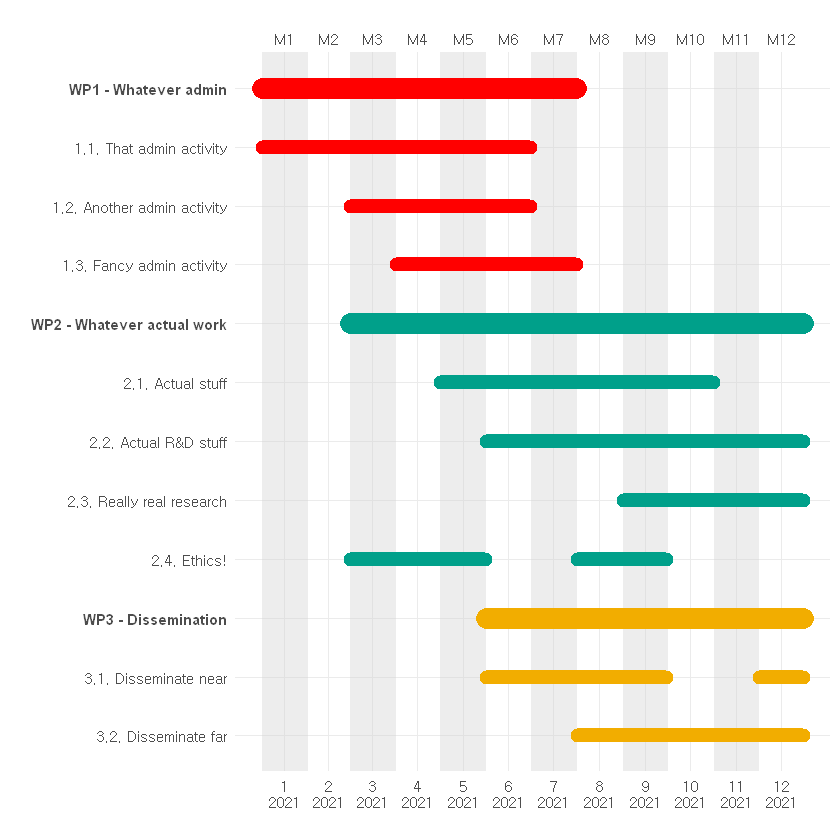

In [28]:
ganttrify(project = df,
          project_start_date = "2021-01",
          font_family = "RobotoCondensed")

In [14]:
!remotes::install_github("giocomai/ganttrify", dependencies = TRUE)

Skipping install of 'ganttrify' from a github remote, the SHA1 (4b1091ff) has not changed since last install.
  Use `force = TRUE` to force installation


ERROR: Error in !remotes::install_github("giocomai/ganttrify", dependencies = TRUE): 잘못된 인자의 유형입니다


In [27]:
windowsFonts(Arial=windowsFont("TT Arial"))
windowsFonts(RobotoCondensed=windowsFont("RobotoCondensed"))


In [11]:
install.packages('extrafont')
library(extrafont)
extrafont::font_import()

also installing the dependencies 'extrafontdb', 'Rttf2pt1'



package 'extrafontdb' successfully unpacked and MD5 sums checked
package 'Rttf2pt1' successfully unpacked and MD5 sums checked
package 'extrafont' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KimTaeyoon\AppData\Local\Temp\RtmpmYPraL\downloaded_packages


Warning message:
"package 'extrafont' was built under R version 3.6.2"Registering fonts with R


Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in C:\WINDOWS\Fonts ...
Extracting .afm files from .ttf files...
C:\Windows\Fonts\AGENCYB.TTF => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/AGENCYB
C:\Windows\Fonts\AGENCYR.TTF => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/AGENCYR
C:\Windows\Fonts\ALGER.TTF => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/ALGER
C:\Windows\Fonts\ANTQUAB.TTF => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/ANTQUAB
C:\Windows\Fonts\ANTQUABI.TTF => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/ANTQUABI
C:\Windows\Fonts\ANTQUAI.TTF => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/ANTQUAI
C:\Windows\Fonts\arial.ttf => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/arial
C:\Windows\Fonts\arialbd.ttf => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extrafontdb/metrics/arialbd
C:\Windows\Fonts\arialbi.ttf => C:/Users/KimTaeyoon/miniconda3/Lib/R/library/extra

In [13]:
systemfonts::system_fonts()

path,index,name,family,style,weight,width,italic,monospace
C:\WINDOWS\Fonts\arial.ttf,0,ArialMT,Arial,Regular,normal,normal,FALSE,FALSE
C:\WINDOWS\Fonts\ariblk.ttf,0,Arial-Black,Arial,Black,heavy,normal,FALSE,FALSE
C:\WINDOWS\Fonts\arialbd.ttf,0,Arial-BoldMT,Arial,Bold,bold,normal,FALSE,FALSE
C:\WINDOWS\Fonts\arialbi.ttf,0,Arial-BoldItalicMT,Arial,Bold Italic,bold,normal,TRUE,FALSE
C:\WINDOWS\Fonts\ariali.ttf,0,Arial-ItalicMT,Arial,Italic,normal,normal,TRUE,FALSE
C:\WINDOWS\Fonts\bahnschrift.ttf,0,Bahnschrift,Bahnschrift,Regular,normal,normal,FALSE,FALSE
C:\WINDOWS\Fonts\calibri.ttf,0,Calibri,Calibri,Regular,normal,normal,FALSE,FALSE
C:\WINDOWS\Fonts\calibrib.ttf,0,Calibri-Bold,Calibri,Bold,bold,normal,FALSE,FALSE
C:\WINDOWS\Fonts\calibriz.ttf,0,Calibri-BoldItalic,Calibri,Bold Italic,bold,normal,TRUE,FALSE
C:\WINDOWS\Fonts\calibrii.ttf,0,Calibri-Italic,Calibri,Italic,normal,normal,TRUE,FALSE


https://github.com/giocomai/ganttrify


In [14]:
# exceldata = read_excel("C:\\tutorialkart\\r\\sample.xlsx")
# dfdata = data.frame(exceldata)

# data <- read.csv('testfile.csv')
data <- read.csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv")

Warning message in file(file, "rt"):
"cannot open URL 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv': HTTP status was '404 Not Found'"

ERROR: Error in file(file, "rt"): 커넥션을 열 수 없습니다
